In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [ ]:
df=pd.read_csv("datasetaftercleaning.csv")
# Updating the header
df.columns=["","YEAR","MONTH","QTY_DEMANDED","QTY_SUPPLIED"]
df.head(12)
#from plot, we see that seasonality is present
#For ARIMA first thing we do is identify if the data is stationary or non – stationary. if data is non-stationary we will try to make them stationary then we will process further.

,,YEAR,MONTH,QTY_DEMANDED,QTY_SUPPLIED
0,0,2013,January,162.0,136.0
1,1,2013,February,188.0,202.0
2,2,2013,March,229.0,225.0
3,3,2013,April,220.0,204.0
4,4,2013,May,252.0,251.0
5,5,2013,June,322.0,353.0
6,6,2013,July,240.0,261.0
7,7,2013,August,340.0,274.0
8,8,2013,September,247.0,283.0
9,9,2013,October,325.0,329.0


In [ ]:
df.tail()

,,YEAR,MONTH,QTY_DEMANDED,QTY_SUPPLIED
88,88,2020,May,243.0,371.0
89,89,2020,June,332.0,465.0
90,90,2020,July,346.0,457.0
91,91,2020,August,286.0,461.0
92,92,2020,September,233.0,352.0


In [ ]:
df.describe

<bound method NDFrame.describe of         YEAR      MONTH  QTY_DEMANDED  QTY_SUPPLIED
0    0  2013    January         162.0         136.0
1    1  2013   February         188.0         202.0
2    2  2013      March         229.0         225.0
3    3  2013      April         220.0         204.0
4    4  2013        May         252.0         251.0
..  ..   ...        ...           ...           ...
88  88  2020        May         243.0         371.0
89  89  2020       June         332.0         465.0
90  90  2020       July         346.0         457.0
91  91  2020     August         286.0         461.0
92  92  2020  September         233.0         352.0

[93 rows x 5 columns]>

In [ ]:
maxVal_qty = df["QTY_DEMANDED"].max()
minVal_qty = df["QTY_DEMANDED"].min()

index_max_qty=df["QTY_DEMANDED"].idxmax()
index_min_qty=df["QTY_DEMANDED"].idxmin()

print(maxVal_qty,minVal_qty)
print(index_max_qty,index_min_qty)

1221.0 110.0
50 53


In [ ]:
mean_qty = df["QTY_DEMANDED"].mean()
mean_supply = df["QTY_SUPPLIED"].mean()
print("mean demanded: ",mean_qty)
print("mean Supplied: ",mean_supply)

mean demanded:  328.8494623655914
mean Supplied:  446.247311827957


In [ ]:
# Replacing QTY Demanded max and min value by its mean
df["QTY_DEMANDED"][index_max_qty]=mean_qty
df["QTY_DEMANDED"][index_min_qty]=mean_qty

In [ ]:
index_max_supply = df["QTY_SUPPLIED"].idxmax()
maxVal_supply = df["QTY_SUPPLIED"].max()

print("max Supply value",maxVal_supply)
print("max Suuply index",index_max_supply)

# Replacing QTY Supplied max and value by its mean
df["QTY_SUPPLIED"][index_max_qty]=mean_supply

max Supply value 961.0
max Suuply index 53


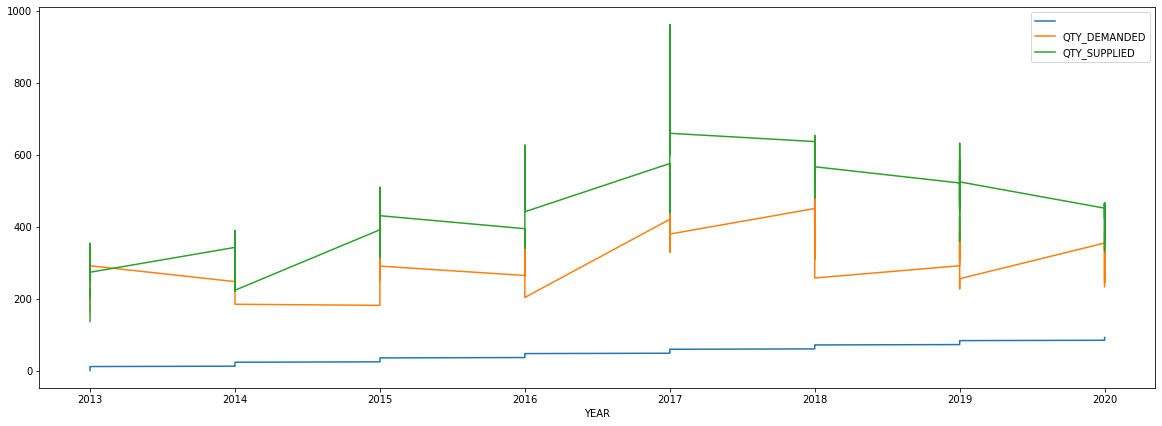

In [ ]:
df.set_index('YEAR',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['QTY_DEMANDED'])

# #We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

def adfuller_test(QTY_DEMANDED):
    result = adfuller(QTY_DEMANDED)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
adfuller_test(df['QTY_DEMANDED'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -5.147123871944002
p-value : 1.1262000664350699e-05
#Lags Used : 0
Number of Observations : 92


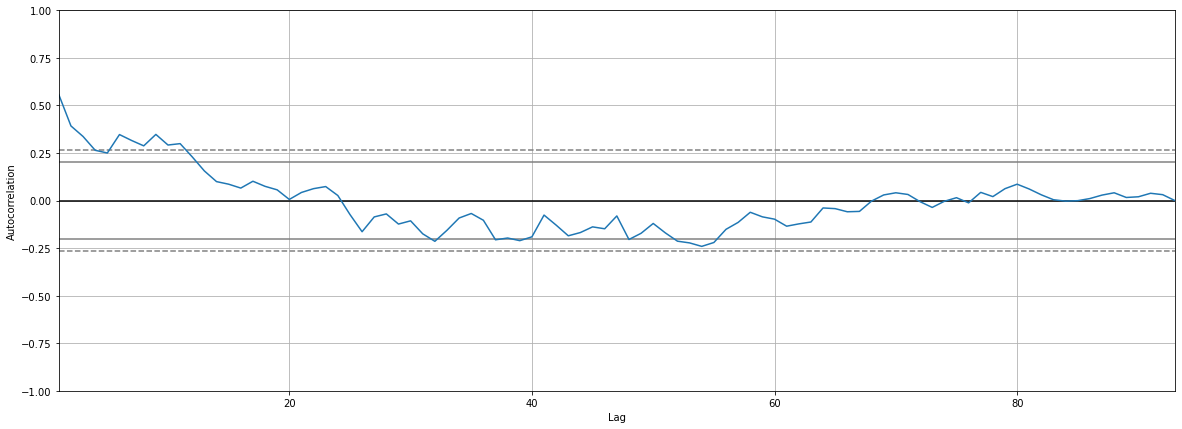

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['QTY_DEMANDED'])
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
plt.show()

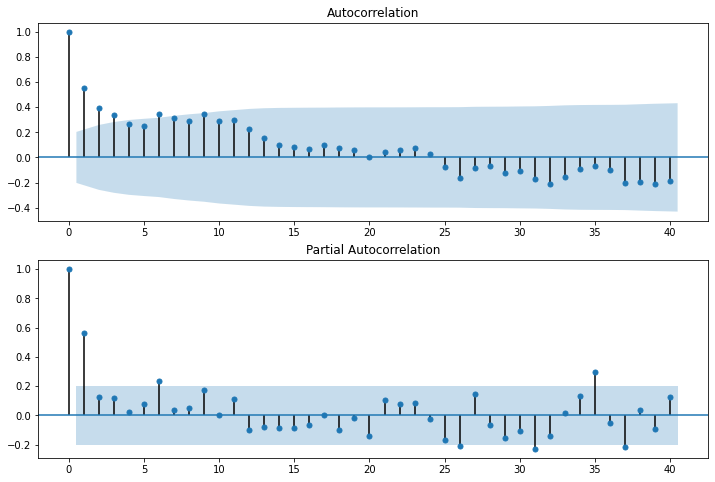

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['QTY_DEMANDED'].dropna(),lags=40,ax=ax1) #Lags=40 Why?
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['QTY_DEMANDED'].dropna(),lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1 Learn how to select these values?

from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm
model=ARIMA(df['QTY_DEMANDED'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.QTY_DEMANDED   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -500.700
Method:                       css-mle   S.D. of innovations             55.678
Date:                Thu, 05 May 2022   AIC                           1009.399
Time:                        17:56:04   BIC                           1019.486
Sample:                             1   HQIC                          1013.470
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7445      1.453      0.512      0.610      -2.104       3.593
ar.L1.D.QTY_DEMANDED     0.2934      0.133      2.204      0.030       0.033       0.554
ma.L1.D.QTY_DEMANDED    -0.8322      0.075    -11.045      0.000      -0.980      -0.684
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4082           +0.0000j            3.4082            0.0000
MA.1            1.2017           +0.0000j            1.2017            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


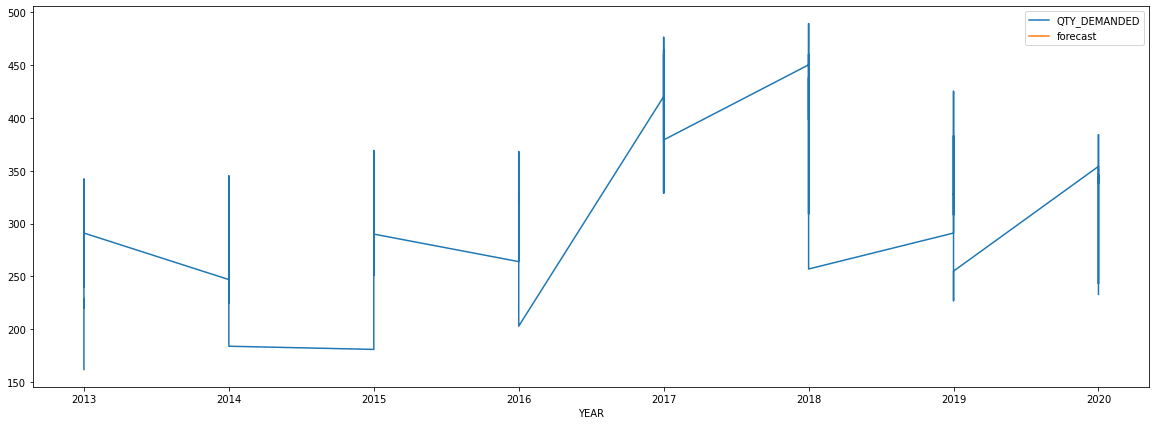

In [ ]:
df['forecast']=model_fit.predict(start=81,end=93,dynamic=True) #If selected start greater than 93 then dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect ?
df[['QTY_DEMANDED','forecast']].plot(figsize=(20,7))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


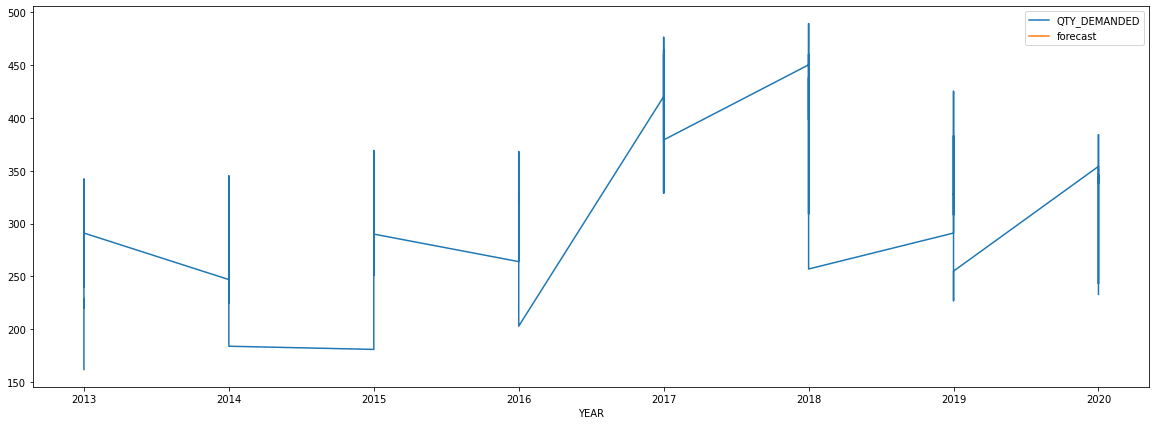

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['QTY_DEMANDED'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=93,end=103,dynamic=True)
df[['QTY_DEMANDED','forecast']].plot(figsize=(20,7))

In [ ]:
[pd.DateOffset(years=2) for x in range(0,24)][0] + pd.Timestamp('2019-10-10 07:15:11')

Timestamp('2021-10-10 07:15:11')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


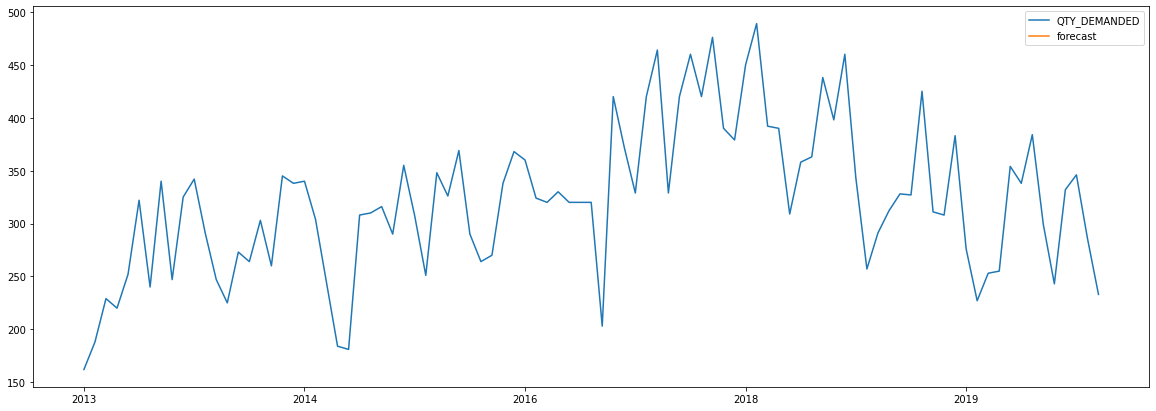

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[pd.Timestamp(df.index[0])+ DateOffset(months=x) for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['QTY_DEMANDED', 'forecast']].plot(figsize=(20, 7))